In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle
import numpy as np

In [2]:
model        = "FiLM"
manifold_dir = './exp/film-exp-1-re/FiLM_manifold_src.pickle'
figsize      = (9,6)
label_type   = ("main", "main-sub")[0]

manifold_src = pickle.load(open(manifold_dir, 'rb'))

if label_type == "main":
    labels = manifold_src['label']
    label_names  = ["non_rel", "rel"]
else:
    labels = np.zeros((manifold_src['label'].shape[0], 1))
    for idx in range(labels.shape[0]):
        main_type = manifold_src['label'][idx][0] * 3
        if manifold_src['label'][idx][-3]:
            sub_type = 0
        elif manifold_src['label'][idx][-2]:
            sub_type = 1
        elif manifold_src['label'][idx][-1]:
            sub_type = 2
        labels[idx] = main_type + sub_type
    
    nonrel_label_names = ["non_rel - shape", "non_rel - horizontal", "non_rel - vertical"]
    rel_label_names = ["rel - shape-closet", "rel - shape-furthest", "rel - count"]
    label_names = nonrel_label_names + rel_label_names

print(label_names)

['non_rel', 'rel']


In [3]:
# -------------------------------------------------------
# gamma and beta as seperate embedding
# -------------------------------------------------------

In [4]:
tsne = TSNE(n_components=1, random_state=0)
gamma_1 = tsne.fit_transform(manifold_src['gamma_1'])
beta_1  = tsne.fit_transform(manifold_src['beta_1'])
gamma_4 = tsne.fit_transform(manifold_src['gamma_4'])
beta_4  = tsne.fit_transform(manifold_src['beta_4'])

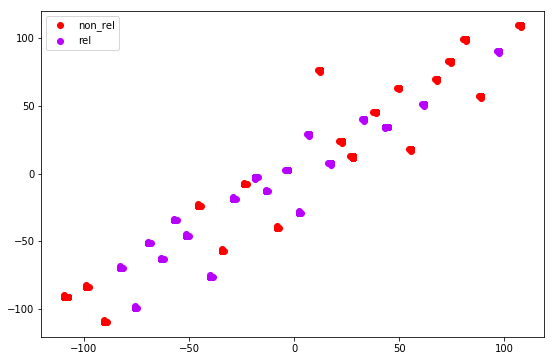

In [5]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = gamma_1[labels[:,0] == idx]
    dim_2 = beta_1[labels[:,0] == idx]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

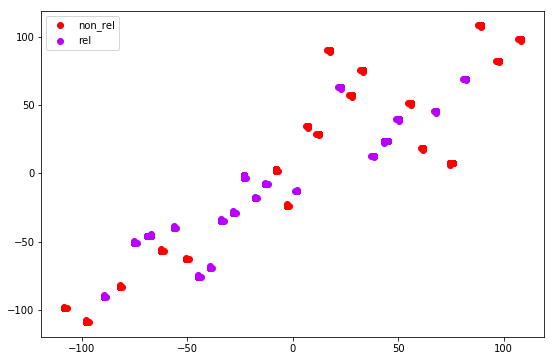

In [6]:
# higher FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = gamma_4[labels[:,0] == idx]
    dim_2 = beta_4[labels[:,0] == idx]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

In [7]:
# -------------------------------------------------------
# gamma and beta as joint embedding
# -------------------------------------------------------

In [8]:
tsne = TSNE(n_components=2, random_state=0)
param_1 = np.concatenate([manifold_src['gamma_1'], manifold_src['beta_1']], axis=1)
param_4 = np.concatenate([manifold_src['gamma_4'], manifold_src['beta_4']], axis=1)

param_1_reduced = tsne.fit_transform(param_1)
param_4_reduced = tsne.fit_transform(param_4)

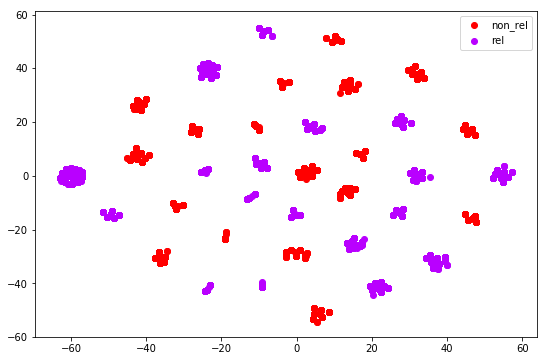

In [9]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_1_reduced[labels[:,0] == idx,0]
    dim_2 = param_1_reduced[labels[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()

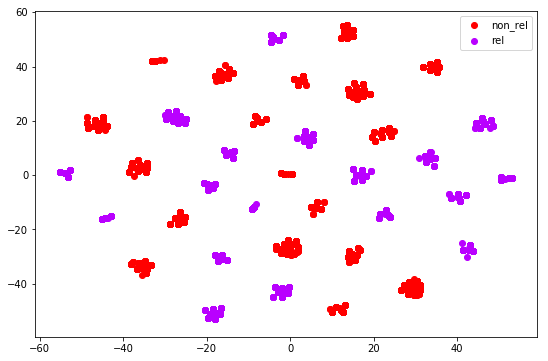

In [10]:
# lower FiLM params
colors = plt.cm.hsv(np.linspace(0, 0.8, len(label_names)), 1).tolist()
plt.figure(figsize=figsize)
for idx, (color, label_name) in enumerate(zip(colors, label_names)):
    dim_1 = param_4_reduced[labels[:,0] == idx,0]
    dim_2 = param_4_reduced[labels[:,0] == idx,1]
    plt.scatter(dim_1, dim_2, c=color, label=label_name, alpha=1)
plt.legend()
plt.show()